# Data Preparation

This notebook contains a script on preparing data ready for input to the Binary Classifier.

In [1]:
import os, sys

In [2]:
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
source_dir = os.path.dirname(parent_dir)

print("Current dir:", current_dir)
print("Parent dir:", parent_dir)
print("Source dir:", source_dir)

# Add parent and source path to Python path
sys.path.insert(0, parent_dir)
sys.path.insert(0, source_dir)

Current dir: /homes/jl1809/Documents/thesis/src/model/binary_classifier
Parent dir: /homes/jl1809/Documents/thesis/src/model
Source dir: /homes/jl1809/Documents/thesis/src


#### Loading the data
We load the joy and anger processed data sets setting joy labels to 0 and anger to 1.

In [3]:
from utils.file_io import load_multiple_processed, load_from_text
from sklearn.utils import shuffle

In [4]:
print("Did you check the root data path?")

Did you check the root data path?


In [10]:
root_data_path = source_dir + "/data/combined/10_tokens/"

# root_data_path = source_dir + "/data/semeval18/processed/"

In [11]:
emotions = {"joy":0, "anger":1}

In [12]:
# OLD

# # Training data
# print("Loading training data from", "/".join(emotions.keys()), "datasets")
# x_train, y_train = load_multiple_processed(root_path=root_data_path, 
#                                                    emotions=list(emotions.keys()), 
#                                                    ignore_labels=[0,1], 
#                                                    datasets=["train"],
#                                                    use_class_labels=True)
# # Joy = 0, Anger = 1
# y_train = [emotions["joy"] if emotion == "joy" else emotions["anger"] for emotion in y_train]


# # Shuffle training data
# x_train_orig, y_train_orig = shuffle(x_train, y_train, random_state=0)

In [13]:
# Old

# # Validation data
# print("Loading training data from", "/".join(list(emotions.keys())), "datasets")

# x_val_orig, y_val = load_multiple_processed(root_path=root_data_path, 
#                                                emotions=list(emotions.keys()), 
#                                                ignore_labels=[0,1], 
#                                                datasets=["val"],
#                                                use_class_labels=True)

# # Label with 0s and 1
# y_val_orig = [emotions["joy"] if emotion == "joy" else emotions["anger"] for emotion in y_val]

In [14]:
# # New
print("Loading training data from", "/".join(emotions.keys()), "datasets")
x_train_orig = []
y_train_orig = []
for emotion in emotions.keys():
    loaded_tweets = load_from_text(root_data_path + emotion + "-train.txt") 
    
    x_train_orig += loaded_tweets
    y_train_orig += [emotions[emotion]] * len(loaded_tweets)
    
assert len(x_train_orig) == len(y_train_orig)    

Loading training data from anger/joy datasets
Reading data from /homes/jl1809/Documents/thesis/src/data/combined/10_tokens/anger-train.txt
Reading data from /homes/jl1809/Documents/thesis/src/data/combined/10_tokens/joy-train.txt


In [15]:
# # # New
print("Loading validation data from", "/".join(emotions.keys()), "datasets")
x_val_orig = []
y_val_orig = []
for emotion in emotions.keys():
    loaded_tweets = load_from_text(root_data_path + emotion + "-val.txt") 
    
    x_val_orig += loaded_tweets
    y_val_orig += [emotions[emotion]] * len(loaded_tweets)
    
assert len(x_val_orig) == len(y_val_orig)    

Loading validation data from anger/joy datasets
Reading data from /homes/jl1809/Documents/thesis/src/data/combined/10_tokens/anger-val.txt
Reading data from /homes/jl1809/Documents/thesis/src/data/combined/10_tokens/joy-val.txt


In [16]:
print("Num training:", len(x_train_orig), "\tNum validation:", len(x_val_orig))

Num training: 4094 	Num validation: 456


In [17]:
print("N class 0:", len(y_train_orig) - sum(y_train_orig), "\tN class 1:", sum(y_train_orig)) 

N class 0: 2376 	N class 1: 1718


### Shuffle data

In [18]:
from sklearn.utils import shuffle

In [19]:
x_train_orig, y_train_orig = shuffle(x_train_orig, y_train_orig)
x_val_orig, y_val_orig = shuffle(x_val_orig, y_val_orig)

#### Sequence distribution

In [20]:
all_training = x_train_orig + x_val_orig

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

(array([   0.,    7.,   46.,  138.,  291.,  467.,  574.,  681.,  754.,
        1592.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Patch objects>)

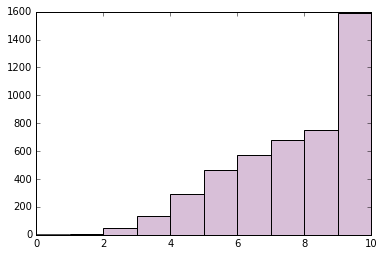

In [22]:
# Let's look at the distribution of our tweets and see what's the average number of tokens per tweet
sequence_token_lengths = [len(sent.split()) for sent in all_training]

plt.hist(sequence_token_lengths, bins=range(max(sequence_token_lengths) + 1), color='thistle')

In [44]:
fontsize = 25
all_labels = y_train_orig + y_val_orig
joy = [len(all_training[index].split()) for index, label in enumerate(all_labels) if label == 0]
anger = [len(all_training[index].split()) for index, label in enumerate(all_labels) if label == 1]

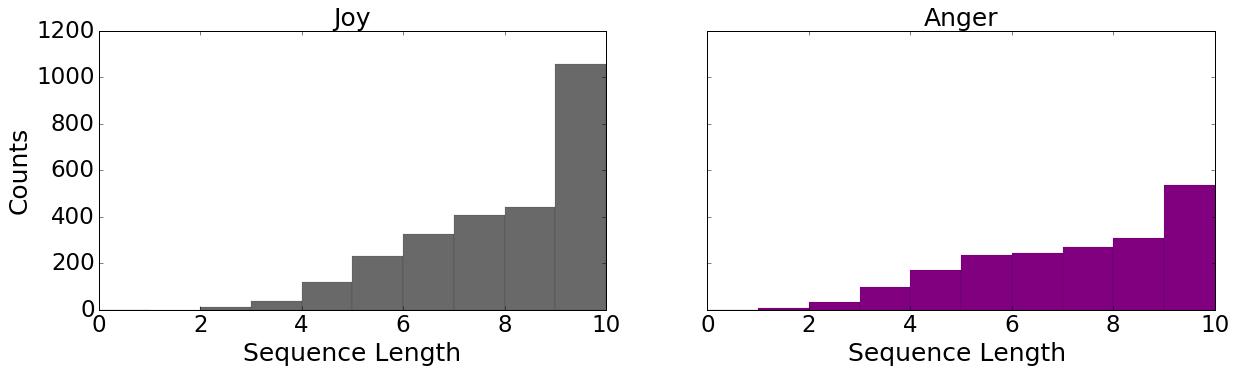

In [48]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20, 5))
ax1.hist(joy, bins=range(max(joy) + 1),color='dimgray', edgecolor='black', linewidth=0.1)
ax1.set_ylabel("Counts", fontsize=fontsize)
ax1.set_xlabel("Sequence Length", fontsize=fontsize)
ax1.set_title("Joy", fontsize=fontsize)
ax1.tick_params(labelsize=fontsize-2)

ax2.hist(anger, bins=range(max(anger) + 1), color='purple', edgecolor='black', linewidth=0.1)
ax2.set_xlabel("Sequence Length ", fontsize=fontsize)
ax2.set_title("Anger", fontsize=fontsize)
ax2.tick_params(labelsize=fontsize-2)

plt.savefig(source_dir + '/length_distribution_10.png', bbox_inches='tight')

#### Remove data

In [23]:
import numpy as np
from utils.model_utils import remove_sentences

Using TensorFlow backend.


In [24]:
MAX_SEQUENCE_LENGTH = 10
print("\nMAX SEQUENCE LENGTH:", MAX_SEQUENCE_LENGTH)


MAX SEQUENCE LENGTH: 10


In [25]:
print("Removing sentences that are greater than {0} tokens in length".format(MAX_SEQUENCE_LENGTH))

Removing sentences that are greater than 10 tokens in length


In [26]:
orig_length = len(x_train_orig)
x_train_orig, y_train_orig = remove_sentences(x_train_orig, y_train_orig, MAX_SEQUENCE_LENGTH)

print("Removed", orig_length - len(x_train_orig), "data points")

Removed 0 data points


In [27]:
orig_length = len(x_val_orig)
x_val_orig, y_val_orig = remove_sentences(x_val_orig, y_val_orig, MAX_SEQUENCE_LENGTH)

print("Removed", orig_length - len(x_val_orig), "data points")

Removed 0 data points


In [28]:
print("Num training:", len(x_train_orig), "\tNum validation:", len(x_val_orig))

Num training: 4094 	Num validation: 456


#### Add <eos\> token

In [29]:
from utils.model_utils import add_special_tokens

In [30]:
# Don't forget this appends
x_train = add_special_tokens(x_train_orig, end=True, end_token="<eos>")
x_val = add_special_tokens(x_val_orig, end=True, end_token="<eos>")

(array([   0.,    0.,    5.,   42.,  126.,  263.,  420.,  519.,  600.,
         683., 1436.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 11 Patch objects>)

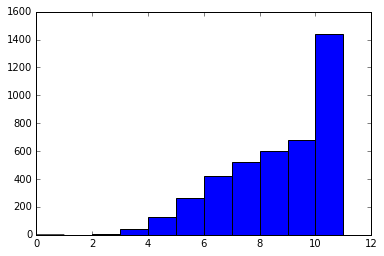

In [31]:
# Check
sequence_token_lengths = [len(sent.split()) for sent in x_train]
plt.hist(sequence_token_lengths, bins=range(max(sequence_token_lengths) + 1))

(array([ 0.,  0.,  0.,  0.,  2.,  9.,  7.,  4.,  4.,  6.,  7., 14., 16.,
        11., 11., 13., 10.,  9., 14., 11., 13.,  7., 17., 14., 26.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 25 Patch objects>)

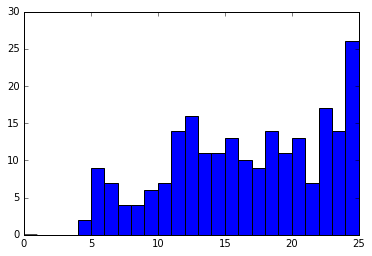

In [28]:
# Check
sequence_token_lengths = [len(sent.split()) for sent in x_val]
plt.hist(sequence_token_lengths, bins=range(max(sequence_token_lengths) + 1))

#### Encode

In [29]:
from utils.model_utils import one_hot_data
from utils.file_io import load_pickle

In [30]:
# Load dictionary
print("Did you check the vocabulary path?")
# vocab_path = source_dir + "/vocabulary/unsupervised_data_vocab_10_min4.pl"
vocab_path = source_dir + "/vocabulary/vocab.pl"
vocab_size, word2id, id2word = load_pickle(vocab_path)
print("Loaded vocabulary of size", vocab_size)

Did you check the vocabulary path?
Loaded vocabulary of size 13105


In [41]:
# Now one-hot encode and return numpy array
x_train = one_hot_data(x_train, word2id, max_sequence_length=MAX_SEQUENCE_LENGTH + 1)  # +1 for eos
x_val = one_hot_data(x_val, word2id, max_sequence_length=MAX_SEQUENCE_LENGTH + 1)

In [38]:
print("X train input shape", x_train.shape)
print("X val input shape", x_val.shape)

X train input shape (1300, 25, 13105)
X val input shape (225, 25, 13105)


In [43]:
y_train = np.asarray(y_train_orig)
y_val = np.asarray(y_val_orig)

In [44]:
print("y train input shape", y_train.shape)
print("y val input shape", y_val.shape)

y train input shape (1300,)
y val input shape (225,)
